In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [24]:
x = np.array(pickle.load(open("x.pickle", "rb")))
y = np.array(pickle.load(open("y.pickle", "rb")))

In [25]:
x = x / 255.0

In [29]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))
# or in one line: model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(x, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 39s 56ms/step - loss: 0.6545 - accuracy: 0.6037 - val_loss: 0.6136 - val_accuracy: 0.6609
Epoch 2/10
702/702 [==============================] - 42s 59ms/step - loss: 0.5661 - accuracy: 0.7114 - val_loss: 0.5446 - val_accuracy: 0.7307
Epoch 3/10
702/702 [==============================] - 42s 59ms/step - loss: 0.5144 - accuracy: 0.7505 - val_loss: 0.5318 - val_accuracy: 0.7435
Epoch 4/10
702/702 [==============================] - 46s 65ms/step - loss: 0.4770 - accuracy: 0.7738 - val_loss: 0.4854 - val_accuracy: 0.7695
Epoch 5/10
702/702 [==============================] - 46s 65ms/step - loss: 0.4474 - accuracy: 0.7903 - val_loss: 0.4768 - val_accuracy: 0.7784
Epoch 6/10
702/702 [==============================] - 47s 66ms/step - loss: 0.4171 - accuracy: 0.8061 - val_loss: 0.4810 - val_accuracy: 0.7760
Epoch 7/10
702/702 [==============================] - 46s 66ms/step - loss: 0.3897 - accuracy: 0.8246 - val_loss: 0.4632 - val_accuracy:

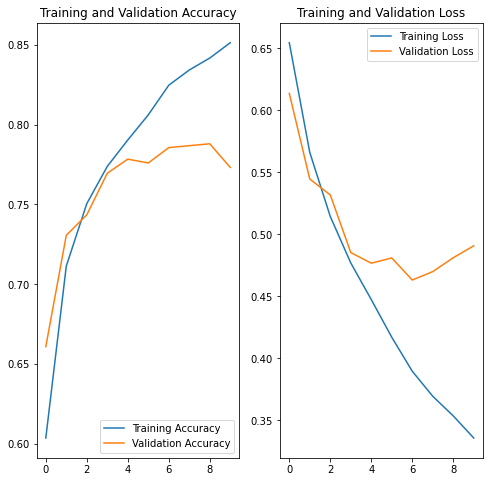

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
model.save('catty_dog_watcher.model')

INFO:tensorflow:Assets written to: catty_dog_watcher.model\assets
